<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/tensorflow2_tutorials/blob/main/tf_GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,Conv2D,Flatten
from tensorflow.keras.metrics import SparseCategoricalCrossentropy,SparseCategoricalAccuracy
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.,x_test/255.

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
#adding new channels to tensors

x_train=x_train[...,tf.newaxis].astype('float32')
x_test=x_test[...,tf.newaxis].astype('float32')

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(10000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [7]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    self.conv2d=Conv2D(filters=32,kernel_size=3,activation='relu')
    self.flatten=Flatten()
    self.d1=Dense(128,activation='relu')
    self.d2=Dense(10,activation='softmax')
  def call(self,x):
    x=self.conv2d(x)
    x=self.flatten(x)
    x=self.d1(x)
    return self.d2(x)

model=MyModel()


In [8]:
loss_obj=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam()

In [9]:
train_loss=tf.keras.metrics.Mean(name='train_loss')
train_accuracy=tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')


In [10]:
test_loss=tf.keras.metrics.Mean(name='test_loss')
test_accuracy=tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [11]:
@tf.function
def train_step(images,labels):
  with tf.GradientTape() as tape:
    predictions=model(images,training=True)
    loss=loss_obj(labels,predictions)
  gradients=tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels,predictions)

In [12]:
@tf.function
def test_step(images,labels):
  with tf.GradientTape() as tape:
    predictions=model(images,training=False)
    loss=loss_obj(labels,predictions)
  gradients=tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  test_loss(loss)
  test_accuracy(labels,predictions)

In [13]:
epochs=5

for i in range(epochs):
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images,labels in train_ds:
    train_step(images,labels)

  for test_images,test_labels in test_ds:
    test_step(test_images,test_labels)

  print('Epoch',i+1)
  print('--train loss',train_loss.result())
  print('--train accuracy',train_accuracy.result())
  print('\n--test loss',test_loss.result())
  print('--test accuracy',test_accuracy.result())

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1
--train loss tf.Tensor(0.13126038, shape=(), dtype=float32)
--train accuracy tf.Tensor(0.96071666, shape=(), dtype=float32)

--test loss tf.Tensor(0.057880573, shape=(), dtype=float32)
--test accuracy tf.Tensor(0.9807, shape=(), dtype=float32)
Epoch 2
--train loss tf.Tensor(0.040088095, shape=(), dtype=float32)
--train accuracy tf.Tensor(0.98735, shape=(), dtype=float32)

--test loss tf.Tensor(0.021240003, shape=(), dtype=float32)
--test accuracy tf.Tensor(0.9928, shape=(), dtype=float32)
Epoch 3
--train loss tf.Tensor(0.0208148, shape=(), dtype=float32)
--train accuracy tf.Tensor(0.993, shape=(), dtype=float32)

--test loss tf.Tensor(0.012713505, shape=(), dtype=float32)
--test accuracy tf.Tensor(0.9964, shape=(), dtype=float32)
Epoch 4
--train loss tf.Tensor(0.0119674625, shape=(), dtype=float32)
--train accuracy tf.Tensor(0.9959, shape=(), dtype=float32)

--test loss tf.Tensor(0.009368645, shape=(), dtype=float32)
--test accuracy tf.Tensor(0.9959, shape=(), dtype=float32)
Ep

In [14]:
x_train[0].shape

(28, 28, 1)

In [15]:
np.argmax(model.predict(tf.expand_dims(x_test[0],axis=0)),axis=1)

array([7])

In [16]:
y_test[0]

7

In [17]:
y_train_pred=np.argmax(model.predict(x_train),axis=1)
y_test_pred=np.argmax(model.predict(x_test),axis=1)

In [18]:
from tensorflow.keras.metrics import Accuracy,Precision
from sklearn.metrics import accuracy_score,precision_score,roc_curve,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

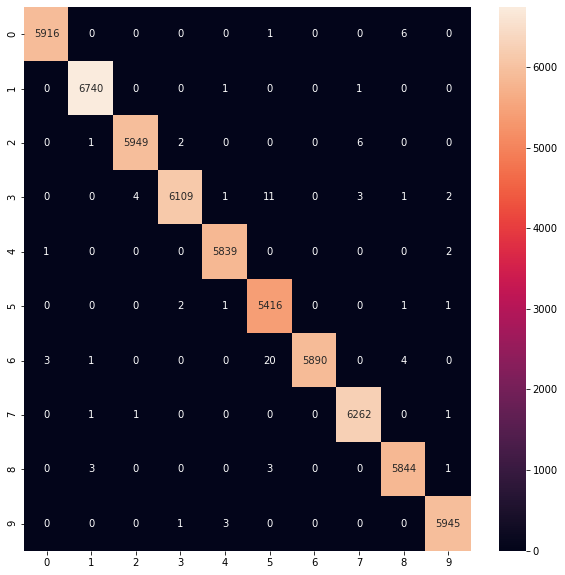

In [19]:
cm=confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f',)
plt.show()

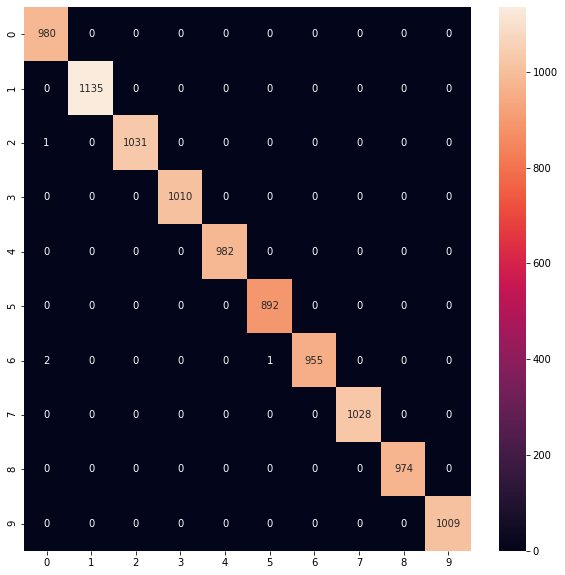

In [20]:
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f',)
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict

In [22]:
accuracy_score(y_test,y_test_pred)

0.9996

In [24]:
precision_score(y_test,y_test_pred,average='weighted')

0.999601027546681